In [38]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(train_df.shape)
print(test_df.shape)

(524164, 11)
(174722, 10)


In [2]:
train_df.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


컬럼 정리                  
RhythmScore               : 트랙의 리듬 품질                     
AudioLoudness             : 트랙의 전체적인 소리 크기               
VocalContent              : 보컬(가사 있는 노래)의 존재 여부나 정도                  
AcousticQuality           : 레코딩의 깨끗함이나 자연스러움 정도를 평가한 수치                       
InstrumentalScore         : (악기 중심) 비율 또는 정도                      
LivePerformanceLikelihood : 트랙이 실제 라이브 퍼포먼스에서 연주된 것인지                   
MoodScore                 : 곡의 분위기(감정)를 수치화한 것                    
TrackDurationMs           : 트랙의 재생 시간                  
Energy                    : 곡의 역동성과 강도                
BeatsPerMinute            : 분당 비트 수                         

In [3]:
train_df.describe().style.background_gradient(cmap='Blues')

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257586,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


In [4]:
train_df.isna().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [5]:
train_df.drop(columns='id',axis=1,inplace=True)

In [6]:
train_df.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


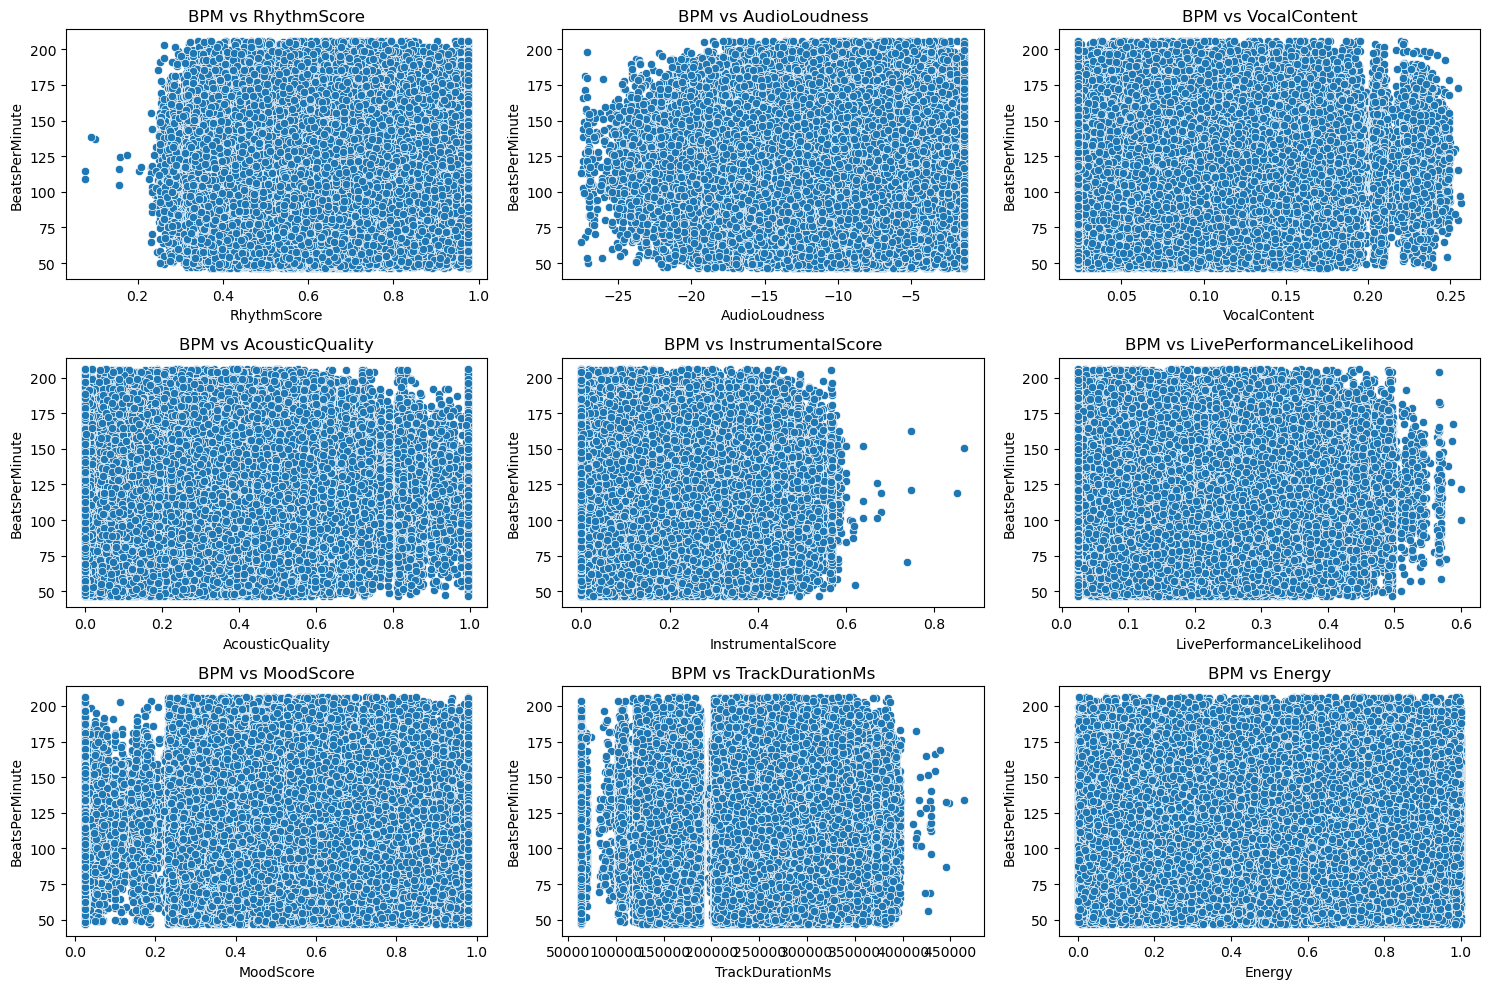

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
features = train_df.drop(columns='BeatsPerMinute')
plt.figure(figsize=(15,10))

for i, feature in enumerate(features, 1):
    plt.subplot(3,3,i)
    sns.scatterplot(x=feature, y='BeatsPerMinute', data=train_df)
    plt.title(f'BPM vs {feature}')
plt.tight_layout()
plt.show()

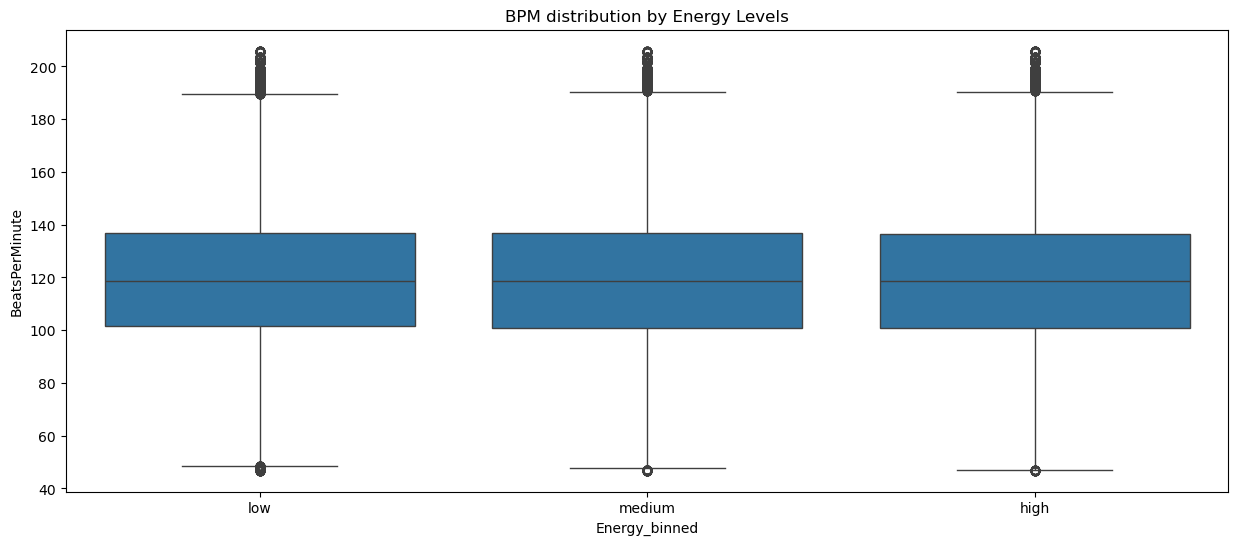

In [8]:
train_df['Energy_binned'] = pd.qcut(train_df['Energy'], q=3, labels = ['low','medium','high'])
plt.figure(figsize=(15, 6))
sns.boxplot(x='Energy_binned', y='BeatsPerMinute',data=train_df)
plt.title('BPM distribution by Energy Levels')
plt.show()

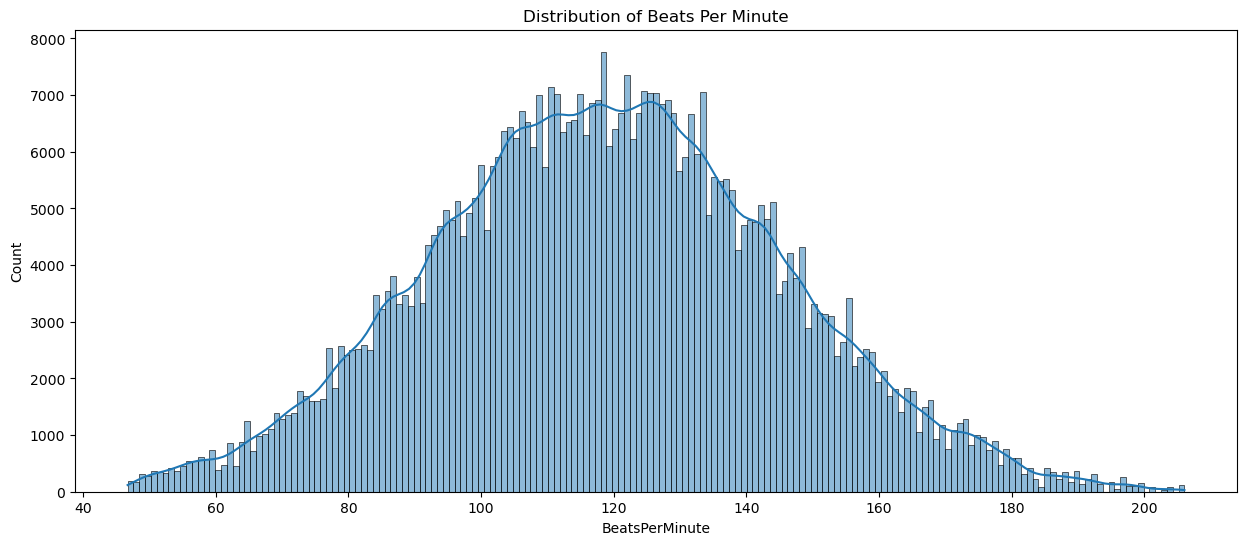

In [9]:
plt.figure(figsize=(15,6))
sns.histplot(train_df['BeatsPerMinute'],kde=True)
plt.title('Distribution of Beats Per Minute')
plt.show()

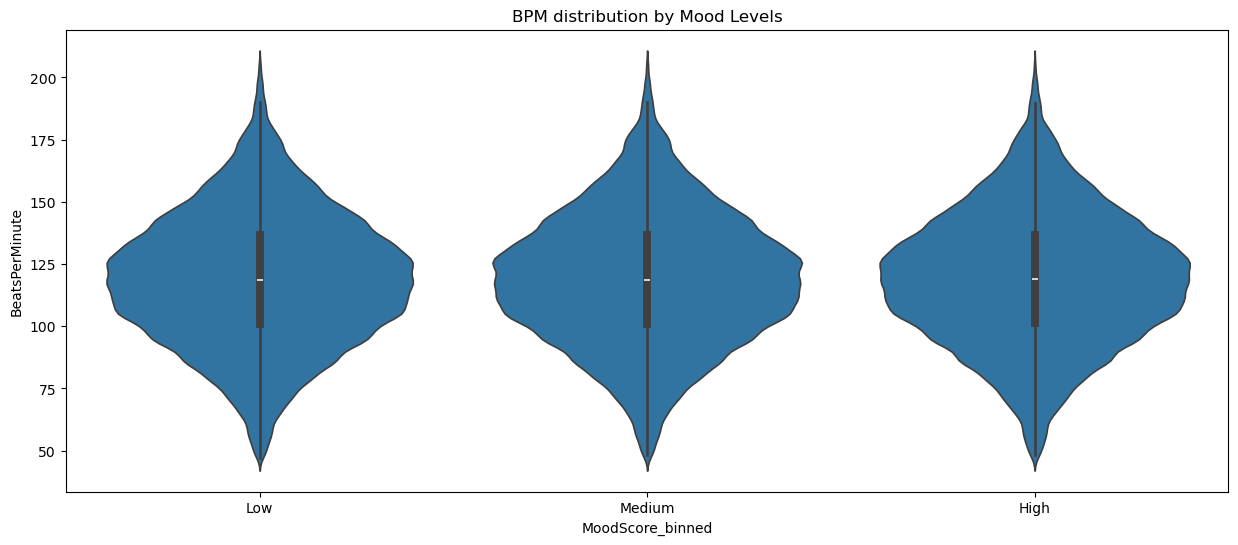

In [10]:
train_df['MoodScore_binned'] = pd.qcut(train_df['MoodScore'],q=3,labels=['Low','Medium','High'])
plt.figure(figsize=(15,6))
sns.violinplot(x='MoodScore_binned',y='BeatsPerMinute', data=train_df)
plt.title('BPM distribution by Mood Levels')
plt.show()

In [11]:
train_df.drop(columns=['Energy_binned','MoodScore_binned'],inplace=True)

In [12]:
from sklearn.model_selection import train_test_split
X = train_df.drop(columns='BeatsPerMinute')
y = train_df['BeatsPerMinute']

In [13]:
import numpy as np
X['Log_TrackDurationMs'] = np.log1p(X['TrackDurationMs'])
X['Log_AudioLoudness'] = np.log1p(-X['AudioLoudness'])

In [16]:
X.drop(columns=['TrackDurationMs','AudioLoudness'],axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
poly_columns = poly.get_feature_names_out(X.columns)
X_poly = pd.DataFrame(X_poly, columns=poly_columns)
y_capped = np.clip(y, y.quantile(0.01), y.quantile(0.99))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y_capped, test_size = 0.2, random_state=2020158011)

In [25]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(iterations=1000,learning_rate=0.005,depth=6,loss_function='RMSE',random_state=42,verbose=200)

cat_model.fit(X_train, y_train)

0:	learn: 26.1198222	total: 182ms	remaining: 3m 1s
200:	learn: 26.1093313	total: 11s	remaining: 43.7s
400:	learn: 26.1027643	total: 21.7s	remaining: 32.4s
600:	learn: 26.0967017	total: 32.3s	remaining: 21.5s
800:	learn: 26.0911188	total: 43.5s	remaining: 10.8s
999:	learn: 26.0855450	total: 54.2s	remaining: 0us


In [29]:
from sklearn.metrics import (mean_squared_error,
                            mean_absolute_error,
                            r2_score,
                            explained_variance_score,
                            mean_absolute_percentage_error,
                            median_absolute_error,
                            max_error)
                            
y_pred = cat_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
maxerr = max_error(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"Explained Variance: {evs:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"Median AE: {medae:.4f}")
print(f"Max Error: {maxerr:.4f}")

MSE: 684.3515
RMSE: 684.3515
MAE: 21.0836
R2 Score: 0.0007
Explained Variance: 0.0007
MAPE: 0.1956
Median AE: 17.8476
Max Error: 63.2927


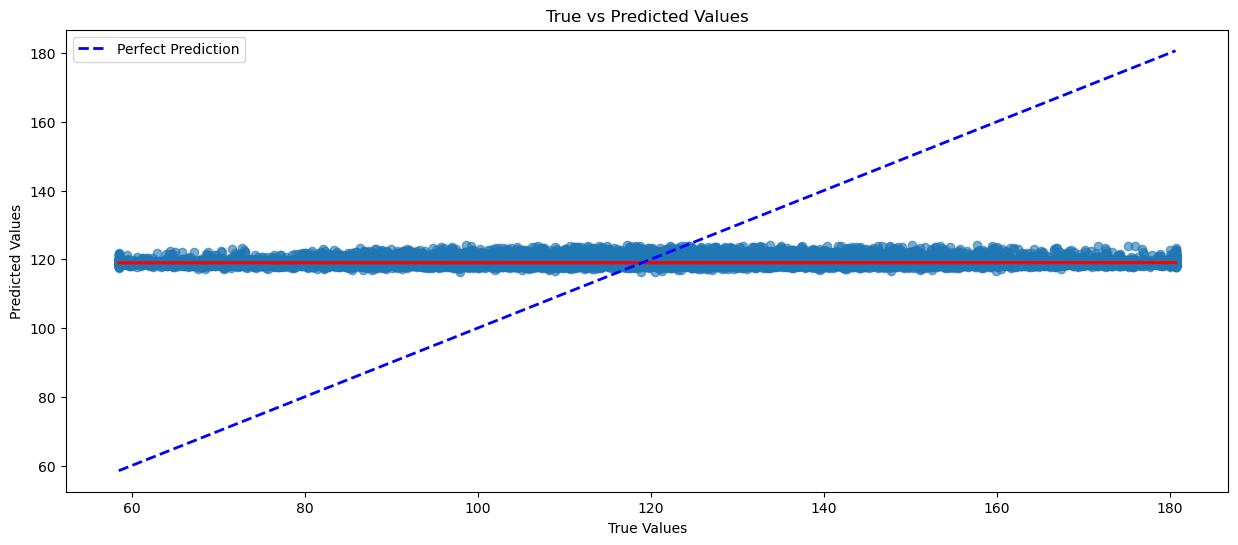

In [30]:
plt.figure(figsize=(15, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"}, scatter_kws={"alpha": 0.6})

# Reference line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='blue', linestyle='--', linewidth=2, label="Perfect Prediction")

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.legend()
plt.show()

In [39]:
Id = test_df['id']

In [40]:
test_df.drop(columns='id',axis=1,inplace=True)

In [41]:
test_df.isna().sum()

RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
dtype: int64

In [42]:
test_df['Log_TrackDurationMs'] = np.log1p(test_df['TrackDurationMs'])
test_df['Log_AudioLoudness'] = np.log1p(-test_df['AudioLoudness'])
test_df.drop(columns=["TrackDurationMs", "AudioLoudness"], axis=1, inplace=True)
test_df = test_df[X_scaled.columns]
test_scaled = scaler.transform(test_df)
test_df_scaled = pd.DataFrame(test_scaled, columns=X_scaled.columns)
test_poly = poly.transform(test_df_scaled)
poly_columns = poly.get_feature_names_out(X_scaled.columns)
test_df = pd.DataFrame(test_poly, columns=poly_columns)

In [43]:
test_df.shape

(174722, 45)

In [44]:
test_df

,RhythmScore,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,Energy,Log_TrackDurationMs,Log_AudioLoudness,RhythmScore VocalContent,...,LivePerformanceLikelihood MoodScore,LivePerformanceLikelihood Energy,LivePerformanceLikelihood Log_TrackDurationMs,LivePerformanceLikelihood Log_AudioLoudness,MoodScore Energy,MoodScore Log_TrackDurationMs,MoodScore Log_AudioLoudness,Energy Log_TrackDurationMs,Energy Log_AudioLoudness,Log_TrackDurationMs Log_AudioLoudness
0,-1.420214,-1.020114,-0.134470,-0.796403,0.788482,0.481099,-0.262305,0.936828,1.322536,1.448779,...,0.379338,-0.206823,0.738672,1.042796,-0.126195,0.450707,0.636271,-0.245735,-0.346908,1.238989
1,-1.082049,1.349161,-0.919627,1.063766,-0.683456,1.213896,1.190119,-0.184412,-2.046571,-1.459858,...,-0.829645,-0.813395,0.126038,1.398742,1.444680,-0.223857,-2.484323,-0.219473,-2.435663,0.377413
2,0.342422,1.870453,0.111648,0.707083,1.248127,-1.112582,-1.265230,1.537062,-1.018056,0.640485,...,-1.388644,-1.579168,1.918449,-1.270663,1.407672,-1.710108,1.132670,-1.944737,1.288074,-1.564815
3,1.612179,0.881993,-1.178322,1.966072,-0.371990,-0.302036,-0.636160,0.545786,-0.330983,1.421930,...,0.112354,0.236645,-0.203027,0.123122,0.192143,-0.164847,0.099969,-0.347207,0.210558,-0.180646
4,0.028986,1.034398,1.237720,-0.369680,-1.303869,0.157018,-0.068480,0.623769,0.004259,0.029983,...,-0.204730,0.089289,-0.813313,-0.005554,-0.010753,0.097943,0.000669,-0.042716,-0.000292,0.002657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174717,-1.911212,1.621169,-0.533029,1.771519,1.093045,0.549010,-0.253108,0.324328,0.467655,-3.098398,...,0.600093,-0.276659,0.354505,0.511168,-0.138959,0.178059,0.256747,-0.082090,-0.118367,0.151674
174718,1.244511,0.948753,0.843644,-0.159373,-0.323855,-1.245639,-1.388469,0.115027,0.685691,1.180734,...,0.403406,0.449662,-0.037252,-0.222064,1.729531,-0.143282,-0.854124,-0.159711,-0.952061,0.078873
174719,-0.404779,1.272066,-0.071786,-0.290227,-0.638653,0.059820,-1.061288,-2.187490,-0.710686,-0.514906,...,-0.038204,0.677795,1.397048,0.453882,-0.063487,-0.130856,-0.042513,2.321557,0.754243,1.554619
174720,0.839722,-0.384835,0.749440,-0.840796,-0.616098,0.435004,-1.494923,-1.113768,0.678055,-0.323155,...,-0.268005,0.921019,0.686190,-0.417749,-0.650297,-0.484493,0.294957,1.664997,-1.013640,-0.755196


In [46]:
y_pred=cat_model.predict(test_df)
df=pd.DataFrame({"id":Id,"BeatsPerMinute":y_pred})
df.to_csv("submission.csv",index=False)

In [47]:
sub = pd.read_csv('submission.csv')
sub.head()

,id,BeatsPerMinute
0,524164,119.099962
1,524165,118.855937
2,524166,118.933472
3,524167,119.177510
4,524168,119.384461
